<a href="https://colab.research.google.com/github/yousrabougara/WalmartSalesForecasting/blob/main/LSTM_LagFeaturesOptuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor
from category_encoders import BinaryEncoder
import pickle
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('clean_Walmart.csv')

In [ ]:
df.head()

,Store_0,Store_1,Store_2,Store_3,Store_4,Store_5,Date,Weekly_Sales,Holiday_Flag,Temperature,...,Unemployment,Month,Year,Season_0,Season_1,Season_2,Lag_1,Lag_2,Lag_3,Lag_4
0,0,0,0,0,0,1,2010-02-05,1.057420,0,-0.995136,...,0.056964,2,2010,0,0,1,-1.826402,-1.798349,-1.771203,-1.744944
1,0,0,0,0,0,1,2010-02-12,1.054348,1,-1.201170,...,0.056964,2,2010,0,0,1,1.060488,-1.798349,-1.771203,-1.744944
2,0,0,0,0,0,1,2010-02-19,1.001206,0,-1.124178,...,0.056964,2,2010,0,0,1,1.057444,1.063497,-1.771203,-1.744944
3,0,0,0,0,0,1,2010-02-26,0.642828,0,-0.760907,...,0.056964,2,2010,0,0,1,1.004772,1.060478,1.067142,-1.744944
4,0,0,0,0,0,1,2010-03-05,0.899914,0,-0.767955,...,0.056964,3,2010,0,1,0,0.649568,1.008264,1.064149,1.071619


In [ ]:
features = df.columns.drop(['Weekly_Sales','Date','Year'])
target = 'Weekly_Sales'


X = df[features]
y = df[target]
 #Scale the features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape input for LSTM: (samples, time steps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, random_state=42, test_size=0.2)


Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0219 - val_loss: 0.0028
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 12/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

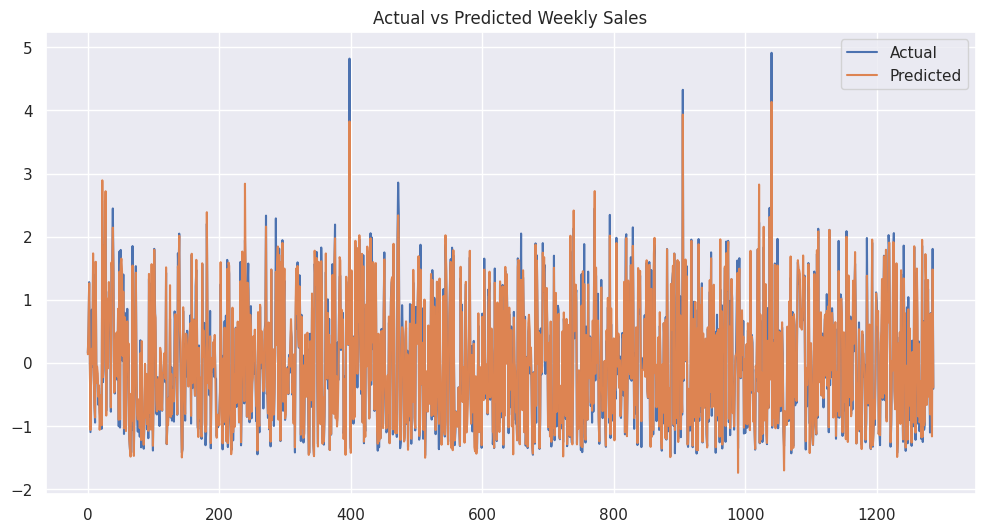

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt



# Define LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.3f}')

# Predictions from the model
predictions = model.predict(X_test)

# Inverse transform predictions and true values to original scale
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Metrics computation
r2 = r2_score(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# MAPE computation
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE while avoiding division by zero."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

# Print the metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

# Visualization of predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Ensure input data X and y are not empty and contain no NaN values
if X.isnull().values.any() or y.isnull().values.any():
    raise ValueError("X or y contains NaN values. Please clean the data before proceeding.")

# Scale the features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape input for LSTM: (samples, time steps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, random_state=42, test_size=0.2)


def create_lstm_model(hyperparams):
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
    model.add(Dense(1))  # Output layer for regression

    # Optimizer with suggested hyperparameters
    optimizer = Adam(learning_rate=hyperparams["learning_rate"],
                      beta_1=hyperparams["adam_beta"],
                      beta_2=0.999,
                      epsilon=1e-07)

    model.compile(optimizer=optimizer, loss='mse')
    return model


def objective(trial):
    hyperparams = {
        "max_iterations": trial.suggest_int("max_iterations", 500, 1500),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
        "momentum": trial.suggest_uniform("momentum", 0.1, 0.9),
        "adam_beta": trial.suggest_uniform("adam_beta", 0.9, 0.999),
        "weight_range": trial.suggest_uniform("weight_range", 0.1, 0.5),
    }

    # Create model with hyperparameters
    model = create_lstm_model(hyperparams)

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=hyperparams["max_iterations"], batch_size=32,
              validation_split=0.2, callbacks=[early_stopping], verbose=0)

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()

    # Compute R² score for maximization
    r2 = r2_score(y_test, y_pred)
    return r2


# Create an Optuna study to maximize R² score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Display the best hyperparameters
best_params = study.best_params
print("Best parameters found by Optuna:", best_params)

# Build the final model with the best parameters
final_model = create_lstm_model(best_params)

# Train the final model
final_model.fit(X_train, y_train, epochs=best_params['max_iterations'], batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the final model
y_pred = final_model.predict(X_test).flatten()

# Inverse scale the target values
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Compute evaluation metrics
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse) * 100

# Display evaluation results
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")


[I 2025-02-10 09:08:01,852] A new study created in memory with name: no-name-bcbbcd82-468c-47db-a215-d4562af0f0a3


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:09:14,560] Trial 0 finished with value: 0.9378634638396726 and parameters: {'max_iterations': 848, 'learning_rate': 0.00024894624994365876, 'momentum': 0.5602760338377673, 'adam_beta': 0.9216939348977592, 'weight_range': 0.4273875887339229}. Best is trial 0 with value: 0.9378634638396726.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:12:39,694] Trial 1 finished with value: 0.9353940849142537 and parameters: {'max_iterations': 928, 'learning_rate': 6.571146331866232e-05, 'momentum': 0.47954718494069815, 'adam_beta': 0.9966050617153306, 'weight_range': 0.17228464852658876}. Best is trial 0 with value: 0.9378634638396726.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:13:18,111] Trial 2 finished with value: 0.9563417171639653 and parameters: {'max_iterations': 1173, 'learning_rate': 0.001506420126899255, 'momentum': 0.8323396543242371, 'adam_beta': 0.9341072998940816, 'weight_range': 0.34102489185632845}. Best is trial 2 with value: 0.9563417171639653.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-02-10 09:16:26,402] Trial 3 finished with value: 0.9313393363274185 and parameters: {'max_iterations': 589, 'learning_rate': 5.877512807878373e-05, 'momentum': 0.3990320116294589, 'adam_beta': 0.9523907502826706, 'weight_range': 0.36283834204633436}. Best is trial 2 with value: 0.9563417171639653.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:17:00,976] Trial 4 finished with value: 0.9405075005697774 and parameters: {'max_iterations': 710, 'learning_rate': 0.001102760888021891, 'momentum': 0.7314930470354579, 'adam_beta': 0.9318013716679943, 'weight_range': 0.17529639028944577}. Best is trial 2 with value: 0.9563417171639653.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:17:28,182] Trial 5 finished with value: 0.9646556272597592 and parameters: {'max_iterations': 712, 'learning_rate': 0.0058881310156587985, 'momentum': 0.4747605828302338, 'adam_beta': 0.9883451321372472, 'weight_range': 0.1640057350533244}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-02-10 09:18:00,048] Trial 6 finished with value: 0.9454851332626192 and parameters: {'max_iterations': 1323, 'learning_rate': 0.001432985486939354, 'momentum': 0.5354612660452789, 'adam_beta': 0.9666572383064407, 'weight_range': 0.31755927838132536}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:18:18,343] Trial 7 finished with value: 0.957388107900173 and parameters: {'max_iterations': 563, 'learning_rate': 0.01643765305808967, 'momentum': 0.6140458210382307, 'adam_beta': 0.9525995266636522, 'weight_range': 0.4556779641716403}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:20:55,696] Trial 8 finished with value: 0.9385058352316117 and parameters: {'max_iterations': 1316, 'learning_rate': 9.124355524398151e-05, 'momentum': 0.41569097135040256, 'adam_beta': 0.9746540610770302, 'weight_range': 0.3075323722055819}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:21:10,452] Trial 9 finished with value: 0.957757130004807 and parameters: {'max_iterations': 1339, 'learning_rate': 0.02732161929459712, 'momentum': 0.2829663609940425, 'adam_beta': 0.9096699907944419, 'weight_range': 0.3100400002992594}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-02-10 09:21:19,131] Trial 10 finished with value: -0.0008311250906372081 and parameters: {'max_iterations': 1073, 'learning_rate': 0.08332507413981897, 'momentum': 0.18461329430494167, 'adam_beta': 0.9901537008294545, 'weight_range': 0.10862462910442747}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:21:33,041] Trial 11 finished with value: 0.9575142007184031 and parameters: {'max_iterations': 1457, 'learning_rate': 0.015135099440031921, 'momentum': 0.2301809041555135, 'adam_beta': 0.9017331781892635, 'weight_range': 0.23293211166738942}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:21:51,441] Trial 12 finished with value: 0.9615895437585147 and parameters: {'max_iterations': 769, 'learning_rate': 0.008910700770716953, 'momentum': 0.3266681383102739, 'adam_beta': 0.9137555092790022, 'weight_range': 0.2410937581117711}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:22:14,009] Trial 13 finished with value: 0.9524010532225515 and parameters: {'max_iterations': 767, 'learning_rate': 0.004966091606804969, 'momentum': 0.122943416794977, 'adam_beta': 0.9805191941008746, 'weight_range': 0.21748920384332535}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:22:29,857] Trial 14 finished with value: 0.9276714684496722 and parameters: {'max_iterations': 696, 'learning_rate': 0.08848413325633274, 'momentum': 0.3589107777949929, 'adam_beta': 0.9394771180818815, 'weight_range': 0.11291294074379421}. Best is trial 5 with value: 0.9646556272597592.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:23:04,353] Trial 15 finished with value: 0.9663478358035824 and parameters: {'max_iterations': 938, 'learning_rate': 0.004580620823788587, 'momentum': 0.6743566600804685, 'adam_beta': 0.9635787110503433, 'weight_range': 0.24427331207618863}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:23:43,663] Trial 16 finished with value: 0.9661137278540525 and parameters: {'max_iterations': 1005, 'learning_rate': 0.00457700190038967, 'momentum': 0.6719642882755641, 'adam_beta': 0.9656749316617603, 'weight_range': 0.15851897347055124}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:24:45,921] Trial 17 finished with value: 0.9361276755821256 and parameters: {'max_iterations': 1041, 'learning_rate': 0.00030304314253845675, 'momentum': 0.7102958372485525, 'adam_beta': 0.964216156960502, 'weight_range': 0.26205746223849885}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-10 09:34:09,010] Trial 18 finished with value: 0.9358820699418078 and parameters: {'max_iterations': 1140, 'learning_rate': 2.0505670365820273e-05, 'momentum': 0.8978008257415839, 'adam_beta': 0.9643518785028183, 'weight_range': 0.19371367788720997}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-10 09:34:46,426] Trial 19 finished with value: 0.9580998768545572 and parameters: {'max_iterations': 938, 'learning_rate': 0.0024535710923357, 'momentum': 0.670700170942334, 'adam_beta': 0.944768240371752, 'weight_range': 0.13960187399793106}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-02-10 09:35:39,620] Trial 20 finished with value: 0.9373071955960823 and parameters: {'max_iterations': 919, 'learning_rate': 0.00034871137845138273, 'momentum': 0.8070120448576716, 'adam_beta': 0.9585426558203389, 'weight_range': 0.2651900136838288}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:36:06,657] Trial 21 finished with value: 0.955296794359831 and parameters: {'max_iterations': 858, 'learning_rate': 0.0035600978902429552, 'momentum': 0.6151382242566449, 'adam_beta': 0.9803511249475589, 'weight_range': 0.1495269113109711}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:36:31,706] Trial 22 finished with value: 0.9596911582387982 and parameters: {'max_iterations': 639, 'learning_rate': 0.006383114949361687, 'momentum': 0.47120837741331145, 'adam_beta': 0.9894182681602941, 'weight_range': 0.19827488451837114}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:36:46,729] Trial 23 finished with value: 0.9532404901672329 and parameters: {'max_iterations': 1134, 'learning_rate': 0.026863271995370648, 'momentum': 0.6401715866948341, 'adam_beta': 0.974111959973367, 'weight_range': 0.15972338775103923}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:37:58,733] Trial 24 finished with value: 0.9455730853594428 and parameters: {'max_iterations': 992, 'learning_rate': 0.0005769959495789693, 'momentum': 0.7546513381681565, 'adam_beta': 0.9738227924718896, 'weight_range': 0.2647059153848855}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:38:14,367] Trial 25 finished with value: 0.9437587930869143 and parameters: {'max_iterations': 500, 'learning_rate': 0.010552049363544832, 'momentum': 0.5712579594478282, 'adam_beta': 0.9846791109354255, 'weight_range': 0.1299187536017192}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-10 09:38:39,088] Trial 26 finished with value: 0.9506722952887011 and parameters: {'max_iterations': 1224, 'learning_rate': 0.002421229530373019, 'momentum': 0.49370444990927315, 'adam_beta': 0.9591004176430156, 'weight_range': 0.20157004196445946}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:38:55,652] Trial 27 finished with value: 0.9116421101836767 and parameters: {'max_iterations': 820, 'learning_rate': 0.02753023499786595, 'momentum': 0.6729564270493231, 'adam_beta': 0.9984143240830846, 'weight_range': 0.3725908265750387}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-10 09:39:57,973] Trial 28 finished with value: 0.9486875106792785 and parameters: {'max_iterations': 994, 'learning_rate': 0.0006612288228113704, 'momentum': 0.4340951624038366, 'adam_beta': 0.9711807231583836, 'weight_range': 0.49871742335280117}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:40:51,806] Trial 29 finished with value: 0.9652282782344845 and parameters: {'max_iterations': 831, 'learning_rate': 0.003939176870046023, 'momentum': 0.5562271559026077, 'adam_beta': 0.9478979421198843, 'weight_range': 0.2831371000059102}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:41:31,489] Trial 30 finished with value: 0.9617981510634557 and parameters: {'max_iterations': 894, 'learning_rate': 0.002010231483146119, 'momentum': 0.5644896148617784, 'adam_beta': 0.9246282536024976, 'weight_range': 0.2826152266580972}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-10 09:42:03,891] Trial 31 finished with value: 0.9625990258899334 and parameters: {'max_iterations': 789, 'learning_rate': 0.004015919327248708, 'momentum': 0.5515929739699569, 'adam_beta': 0.9454644452241002, 'weight_range': 0.23450993215690727}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:42:19,316] Trial 32 finished with value: 0.9399240679715514 and parameters: {'max_iterations': 847, 'learning_rate': 0.005764824460434076, 'momentum': 0.7674173876489637, 'adam_beta': 0.9565133702009413, 'weight_range': 0.19113536461409417}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:42:40,573] Trial 33 finished with value: 0.9614415406635294 and parameters: {'max_iterations': 698, 'learning_rate': 0.009989345178997536, 'momentum': 0.5055641004089468, 'adam_beta': 0.9434392908221237, 'weight_range': 0.40550846283162667}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:43:08,373] Trial 34 finished with value: 0.9360007247766915 and parameters: {'max_iterations': 951, 'learning_rate': 0.0008379664979633043, 'momentum': 0.5985768084133214, 'adam_beta': 0.9324500092348227, 'weight_range': 0.3391997130637942}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:43:22,116] Trial 35 finished with value: 0.94797623930685 and parameters: {'max_iterations': 1093, 'learning_rate': 0.04591262306032865, 'momentum': 0.6837176811033291, 'adam_beta': 0.9504952738597551, 'weight_range': 0.2819609189747648}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:43:45,689] Trial 36 finished with value: 0.9440841894636782 and parameters: {'max_iterations': 637, 'learning_rate': 0.003023519454713513, 'momentum': 0.5222628272178929, 'adam_beta': 0.9924690541017568, 'weight_range': 0.16919890357873252}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:44:24,079] Trial 37 finished with value: 0.9524270215623616 and parameters: {'max_iterations': 888, 'learning_rate': 0.0012722805472389046, 'momentum': 0.7981882091686856, 'adam_beta': 0.9677366517761752, 'weight_range': 0.12733557651741279}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2025-02-10 09:44:45,382] Trial 38 finished with value: 0.9629427341461172 and parameters: {'max_iterations': 728, 'learning_rate': 0.01693763939517695, 'momentum': 0.44388861790067635, 'adam_beta': 0.9807618735282406, 'weight_range': 0.10006771133024334}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:45:10,570] Trial 39 finished with value: 0.960929938139602 and parameters: {'max_iterations': 1218, 'learning_rate': 0.006911447229454934, 'momentum': 0.38903743853963557, 'adam_beta': 0.9569283307245167, 'weight_range': 0.3341766519391606}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-02-10 09:45:41,428] Trial 40 finished with value: 0.947077295350228 and parameters: {'max_iterations': 1012, 'learning_rate': 0.0016349119388589452, 'momentum': 0.6349955569432887, 'adam_beta': 0.9395277892214139, 'weight_range': 0.21637267677909838}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:45:59,753] Trial 41 finished with value: 0.9559953686858476 and parameters: {'max_iterations': 755, 'learning_rate': 0.014218943987230772, 'momentum': 0.45416854761649517, 'adam_beta': 0.9830963876830788, 'weight_range': 0.17020609734078773}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:46:22,952] Trial 42 finished with value: 0.956157305892766 and parameters: {'max_iterations': 615, 'learning_rate': 0.020970219819953513, 'momentum': 0.7086670147638555, 'adam_beta': 0.9780758817188362, 'weight_range': 0.1038135454594514}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-10 09:46:53,448] Trial 43 finished with value: 0.9654067325194176 and parameters: {'max_iterations': 709, 'learning_rate': 0.004382961786565759, 'momentum': 0.3698269581476093, 'adam_beta': 0.9939315941320304, 'weight_range': 0.14562854743389933}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:47:19,658] Trial 44 finished with value: 0.9621264922704731 and parameters: {'max_iterations': 815, 'learning_rate': 0.00428649587094149, 'momentum': 0.2929614347901297, 'adam_beta': 0.9872656184957477, 'weight_range': 0.15060076406418524}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-10 09:47:42,530] Trial 45 finished with value: 0.9545851792616687 and parameters: {'max_iterations': 659, 'learning_rate': 0.009125584949177671, 'momentum': 0.374011060936253, 'adam_beta': 0.9933550532824854, 'weight_range': 0.18472102534184714}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:48:46,545] Trial 46 finished with value: 0.960708473313551 and parameters: {'max_iterations': 558, 'learning_rate': 0.0010284558163802858, 'momentum': 0.5816883708492888, 'adam_beta': 0.9963707185018335, 'weight_range': 0.12456930805457134}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:49:07,592] Trial 47 finished with value: 0.9555025301977487 and parameters: {'max_iterations': 853, 'learning_rate': 0.049435079930962064, 'momentum': 0.3282300967203937, 'adam_beta': 0.9537644441179172, 'weight_range': 0.2856348822079271}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-02-10 09:50:58,043] Trial 48 finished with value: 0.9386025377048017 and parameters: {'max_iterations': 682, 'learning_rate': 0.00018125866260845666, 'momentum': 0.5350149666583053, 'adam_beta': 0.9710860272639785, 'weight_range': 0.2152124722930009}. Best is trial 15 with value: 0.9663478358035824.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-10 09:51:31,941] Trial 49 finished with value: 0.9552657321819934 and parameters: {'max_iterations': 737, 'learning_rate': 0.001964640014221852, 'momentum': 0.24458407973807073, 'adam_beta': 0.9629350495427176, 'weight_range': 0.25282060047449945}. Best is trial 15 with value: 0.9663478358035824.


Best parameters found by Optuna: {'max_iterations': 938, 'learning_rate': 0.004580620823788587, 'momentum': 0.6743566600804685, 'adam_beta': 0.9635787110503433, 'weight_range': 0.24427331207618863}
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.974
Mean Absolute Error (MAE): 0.102
Mean Squared Error (MSE): 0.026
Root Mean Squared Error (RMSE): 0.162
Mean Absolute Percentage Error (MAPE): 47.251%
